<a href="https://colab.research.google.com/github/Ninja-draw-coder/PythonProjects/blob/main/StockPrice_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

glob.glob(r'E:\\Shruti\\Edureka\\PortfolioResumeof5DataAnalysisProjectsinPython\\S&P_resources\\individual_stocks_5yr\\*csv')


files = [f for f in glob.iglob(r"E:\\Shruti\\Edureka\\PortfolioResumeof5DataAnalysisProjectsinPython\\S&P_resources\\individual_stocks_5yr\\*") if f.lower().endswith(".csv")]

print(files)

[]


In [1]:
# lets store files of those stock that we have to consider for analysis ..


In [4]:
## use Warnings package to get rid of any future warning ..

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [15]:
all_data = pd.DataFrame()
company_list = [
    r'AAPL_data.csv' ,
    r'AMZN_data.csv' ,
    r'GOOG_data.csv' ,
    r'MSFT_data.csv','AMD_data.csv'

]
for file in company_list:


    current_df = pd.read_csv(file)


    all_data = pd.concat([all_data,current_df],ignore_index=True)


all_data.shape
all_data.head()
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT', 'AMD'], dtype=object)

## 2.. Analysing change in price of the stock overtime !

In [19]:
all_data.isnull().sum()
all_data.describe()
all_data.dtypes

['AAPL' 'AMZN' 'GOOG' 'MSFT' 'AMD']


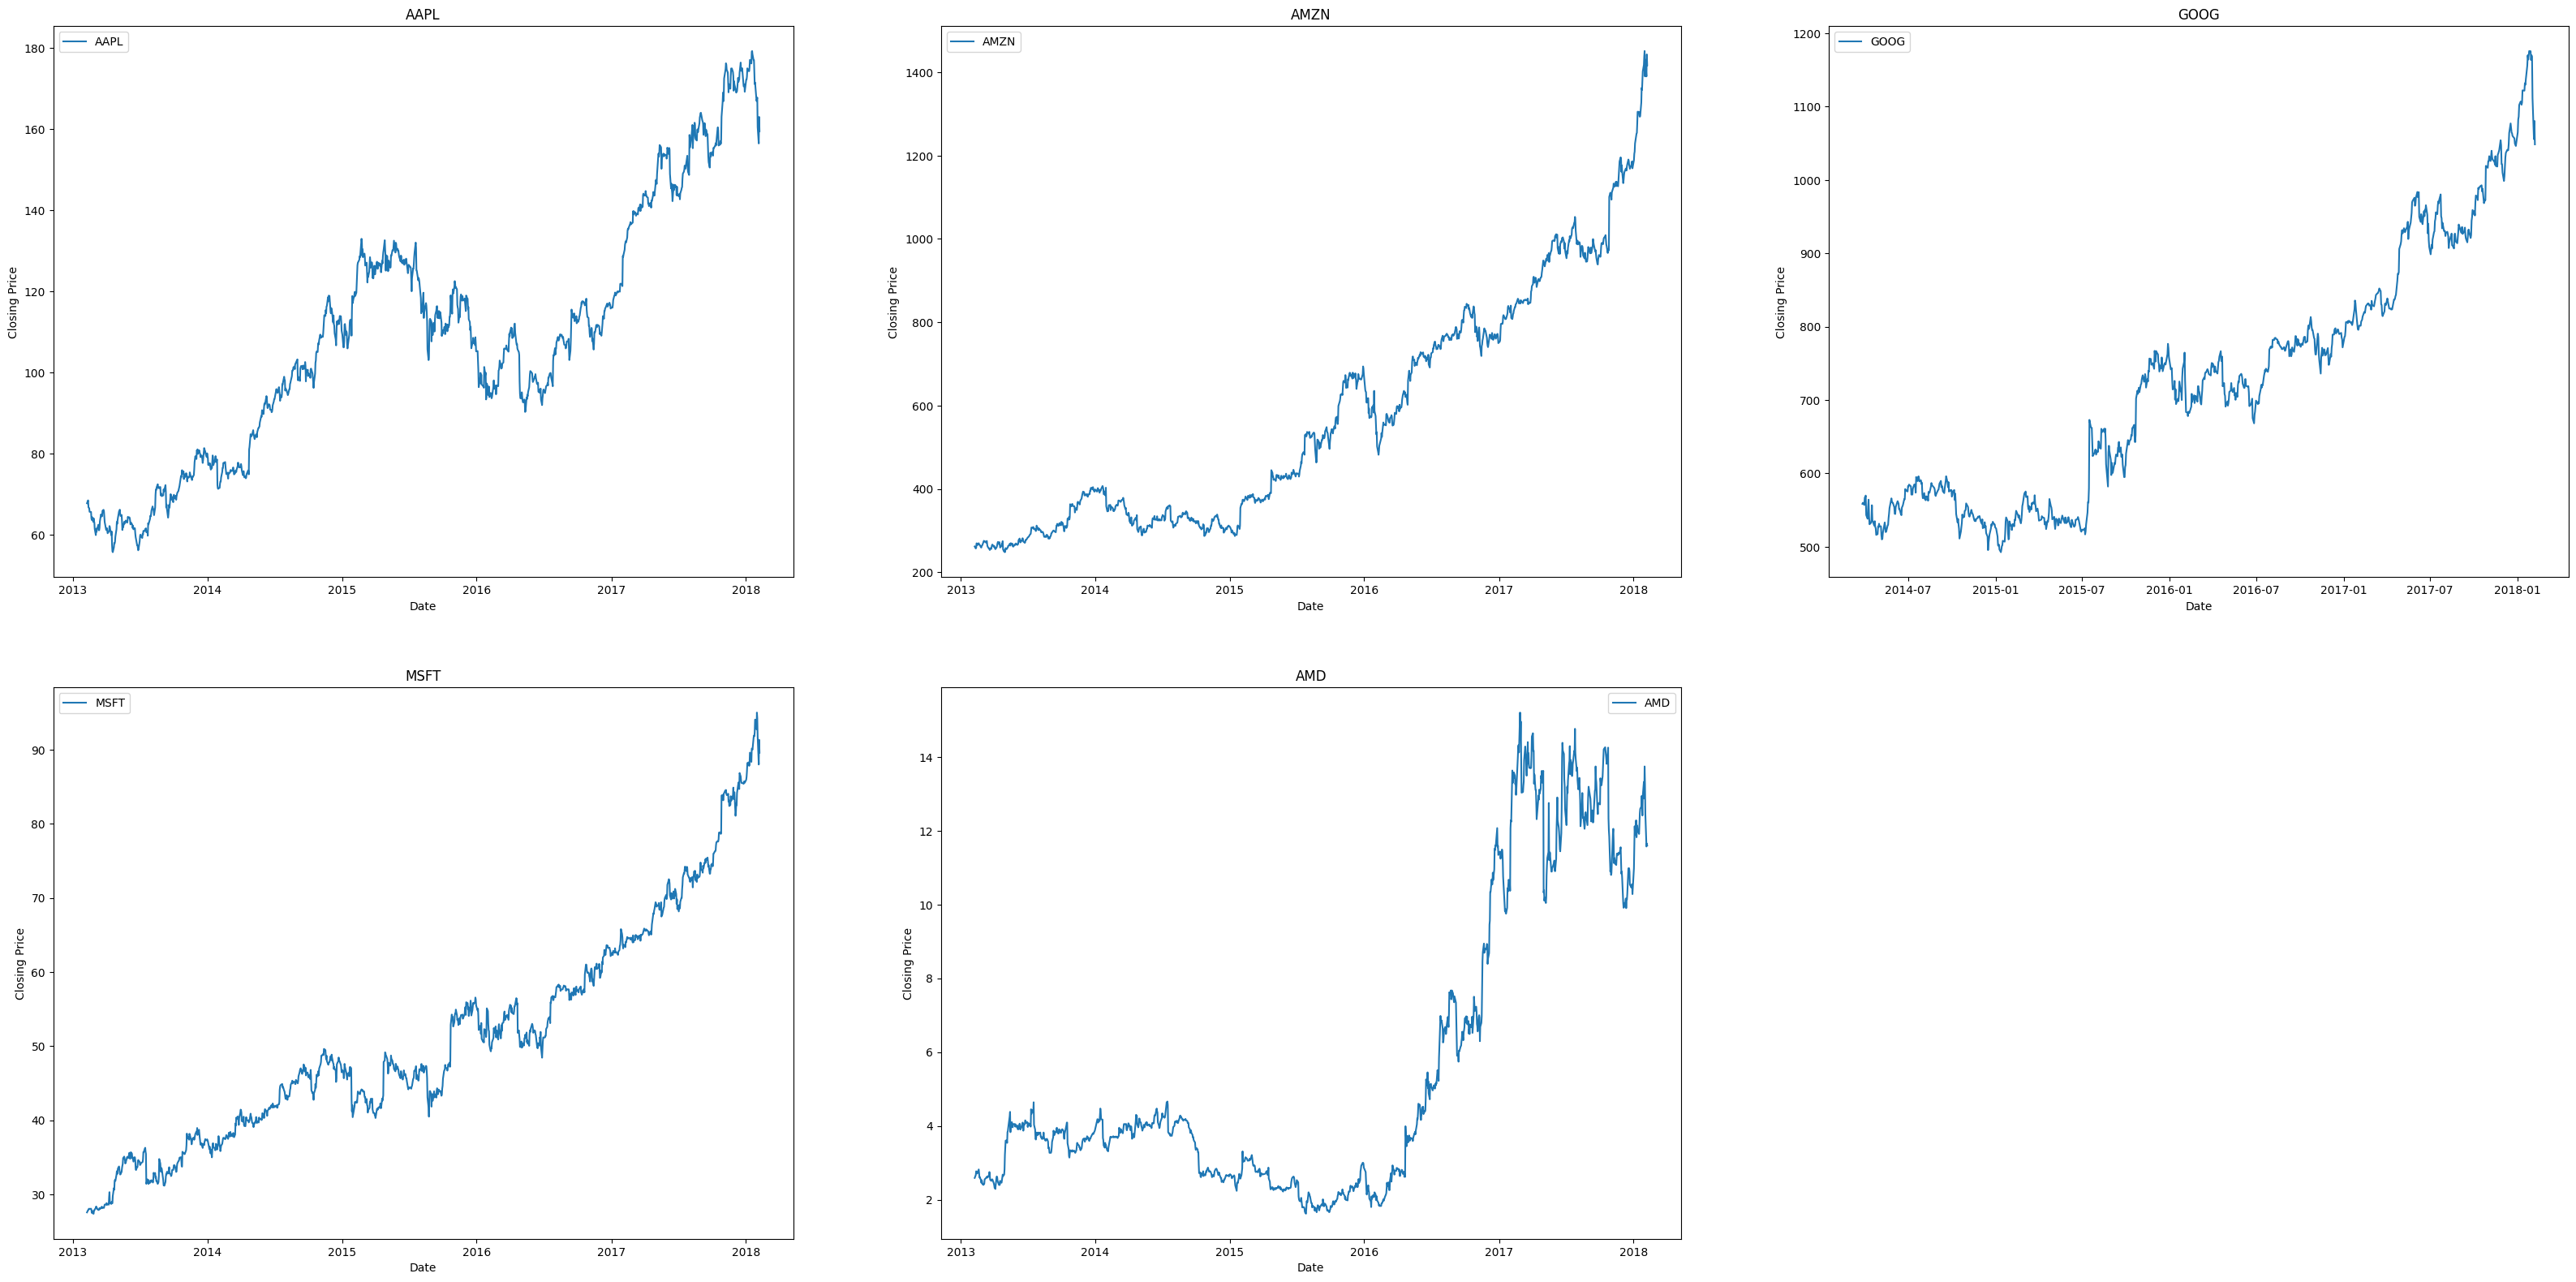

In [34]:
tech_list = all_data['Name'].unique()
print(tech_list)
#for all the companies in the list plot the graph for closing price
index = 1
plt.figure(figsize=(40,30))
for company_name in tech_list:
    plt.subplot(3 , 3 , index) ## creating subplot for each stock
    company_df = all_data[all_data['Name'] == company_name]
    plt.plot(company_df['date'],company_df['close'],label=company_name)
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(company_name)
    index = index + 1

## 3.. moving average of the various stocks !

In [39]:
#Moving average data for closing price
new_data = all_data.copy()
ma_day =[10,20,50]
for ma in ma_day:
    column_name = "MovingAvg_" +(str(ma))
    new_data[column_name] = pd.DataFrame.rolling(new_data['close'],window=ma).mean()
print(new_data)
new_data.set_index('date' , inplace=True)

           date     open     high      low    close     volume  Name  \
0    2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1    2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2    2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3    2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4    2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   
...         ...      ...      ...      ...      ...        ...   ...   
6006 2018-02-01  13.6200  13.8400  13.2100  13.2500   67543333   AMD   
6007 2018-02-02  13.0500  13.0600  12.4300  12.4500   79432558   AMD   
6008 2018-02-05  12.0500  12.1800  10.9300  11.5700  116568862   AMD   
6009 2018-02-06  11.0400  11.7400  11.0000  11.6500   87123202   AMD   
6010 2018-02-07  11.7000  11.9000  11.5300  11.6000   55758364   AMD   

      MovingAvg_10  MovingAvg_20  MovingAvg_50  
0              NaN           NaN           NaN  
1              NaN           NaN     

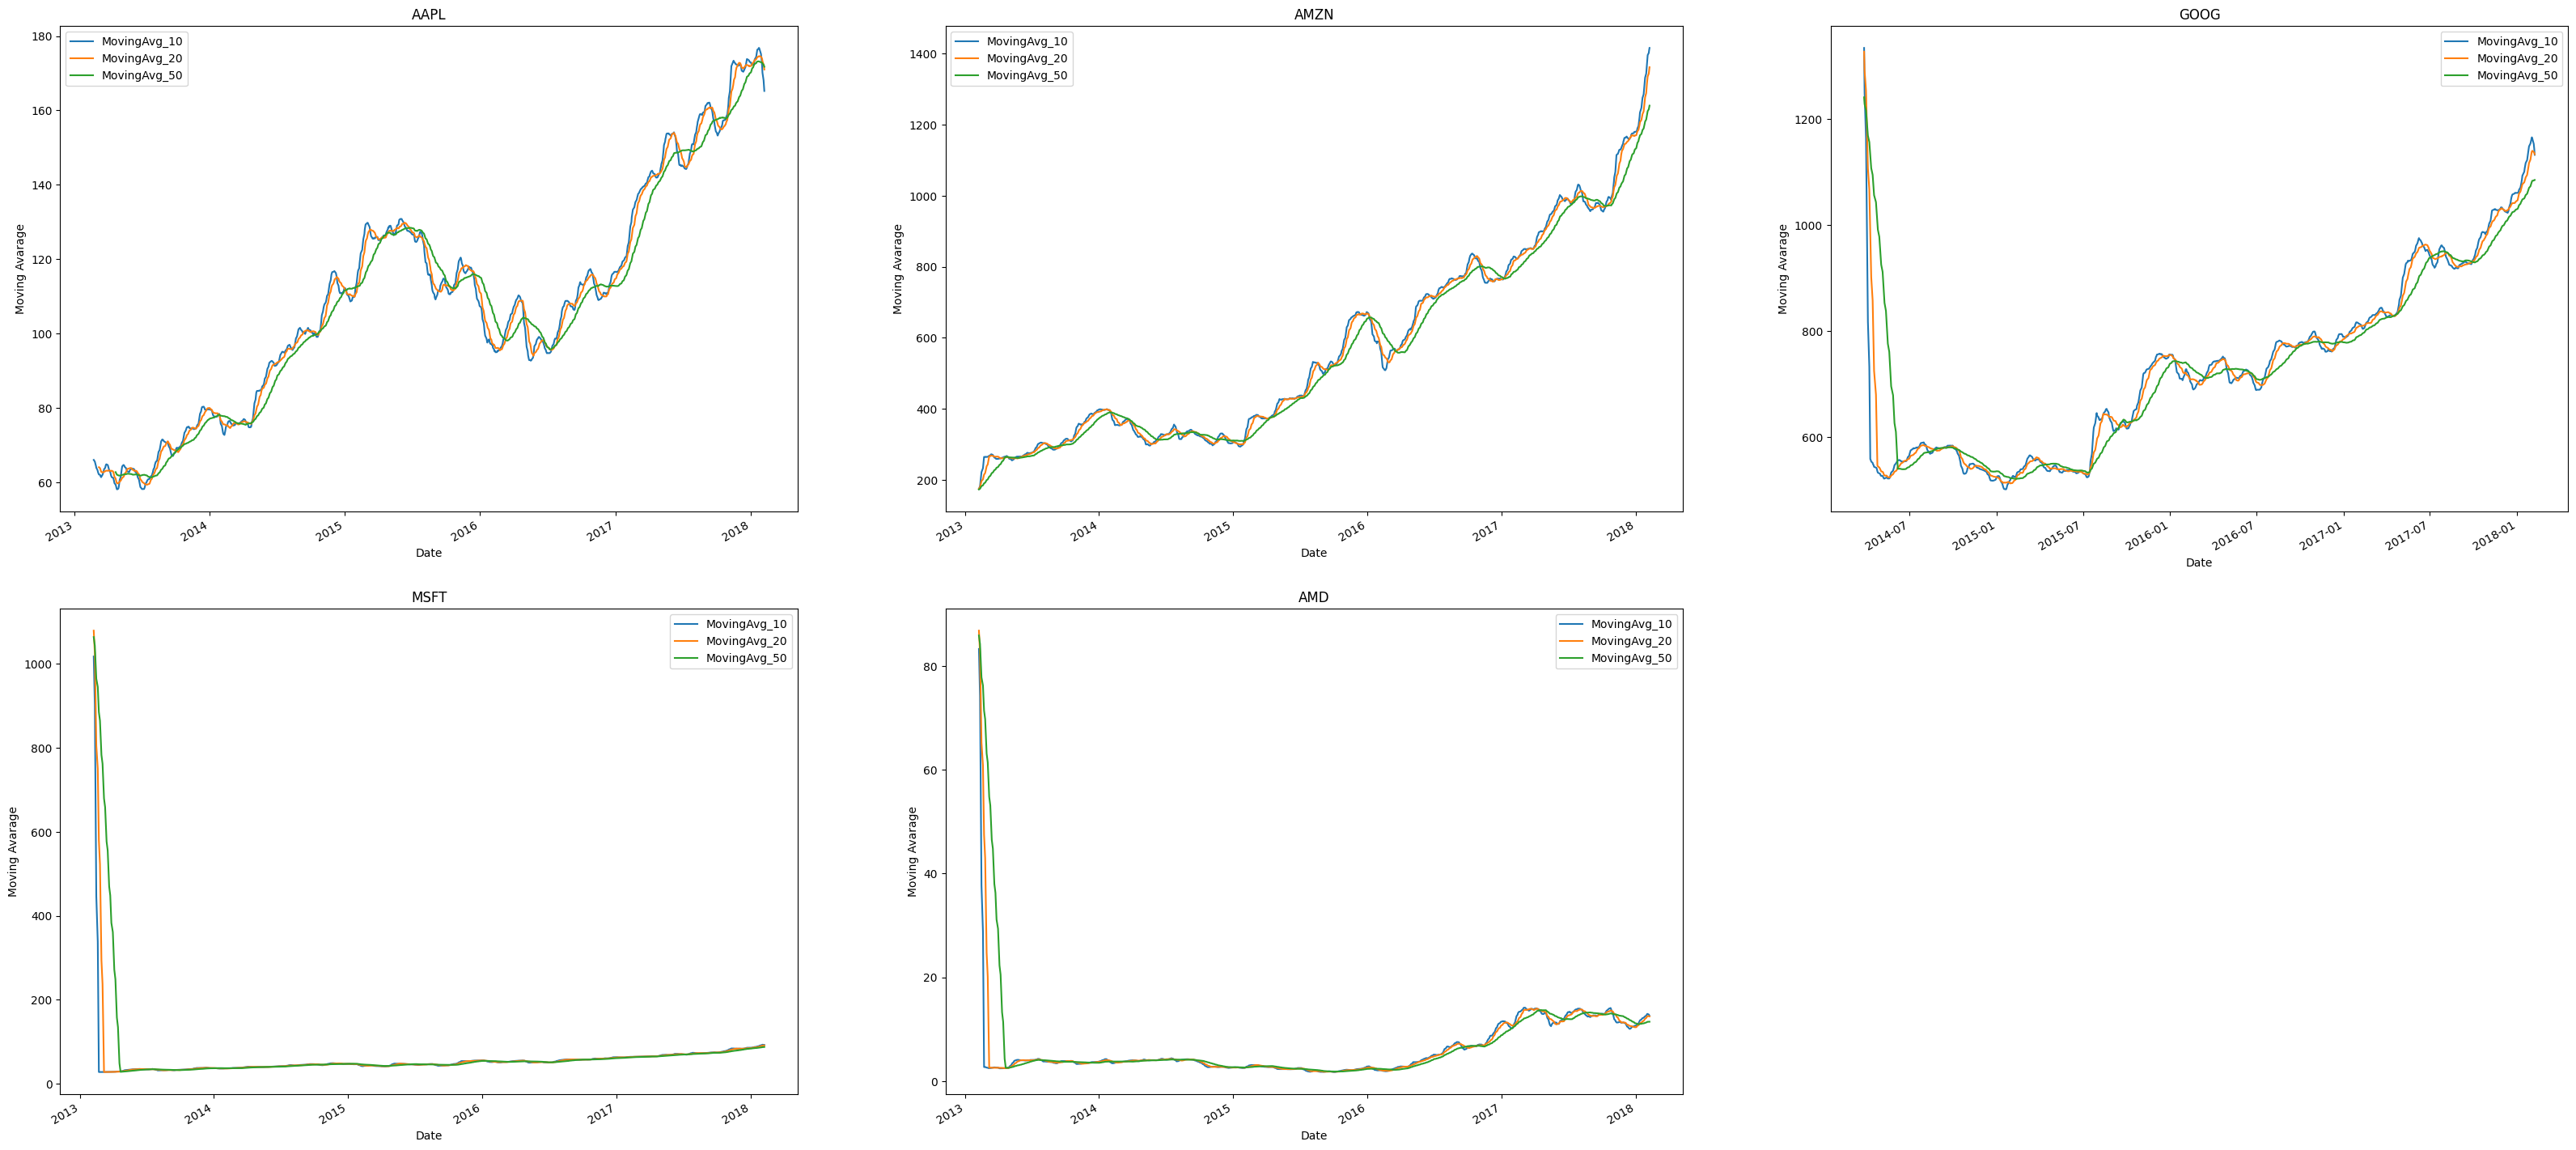

In [40]:
#generate plot for moving avg for each company
plt.figure(figsize=(40,30))

for index, company_name in enumerate(tech_list,1):
    plt.subplot(3 , 3 , index) ## creating subplot for each
    #plot using panda df
    company_df = new_data[new_data['Name'] == company_name]
    company_df[['MovingAvg_10','MovingAvg_20','MovingAvg_50']].plot(label=company_name,ax=plt.gca())
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Moving Avarage')
    plt.title(company_name)

